***TASK 2 - Exploring Relationships***

***Table of Content***

1. Importing Libraries & Options
2. Importing Dataframe
3. Checking the Data
4. Exploring My Questions
5. Exploring Relationships
    A. HEATMAP & SCATTERPLOTS (correlations in general)
    B. HEATMAP & SCATTERPLOTS (correlation related to my questions)
    C. PAIR PLOTS
    D. CATEGORICAL PLOTS
6. New Questions & Hypotheses

In [151]:
from google.colab import drive
drive.mount('/content/drive/')

!pwd

import os
os.chdir('/content/drive/MyDrive/airbnb-data-analysis/code')

!pwd

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/airbnb-data-analysis/code
/content/drive/MyDrive/airbnb-data-analysis/code


***1. Importing Libraries & Options***

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import datetime
# Ensuring the charts I create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [153]:
# Removing limit on column display

pd.options.display.max_columns = None

***2. Importing Dataframe***

In [154]:
# Importing dataframe

df = pd.read_csv('listings_clean.csv', dtype={'host_listings_count': 'str'}, index_col = False)

***3. Checking the Data***

In [155]:
df.shape

(5532, 45)

In [156]:
# Converting 3 variables to date format

df['host_since'] = pd.to_datetime(df['host_since'])
df['first_review'] = pd.to_datetime(df['first_review']) 
df['last_review'] = pd.to_datetime(df['last_review']) 

In [157]:
# Checking data types

df.dtypes

id                                                       int64
host_id                                                  int64
host_since                                      datetime64[ns]
host_response_time                                      object
host_resp_rate_pct                                       int64
host_accept_rate_pct                                     int64
host_is_superhost                                       object
host_listings_count                                     object
host_has_profile_pic                                    object
host_identity_verified                                  object
neighbourhood_cleansed                                  object
latitude                                               float64
longitude                                              float64
property_type                                           object
room_type                                               object
accommodates                                           

In [158]:
df.head()

id  host_id host_since  host_response_time  host_resp_rate_pct  \
0  144978   216682 2010-08-29  within a few hours                 100   
1     958     1169 2008-07-31      within an hour                 100   
2    5858     8904 2009-03-02  within a few hours                  80   
3    8142    21994 2009-06-17  within a few hours                 100   
4    8339    24215 2009-07-02  within a few hours                 100   

   host_accept_rate_pct host_is_superhost host_listings_count  \
0                    89                 f                   9   
1                    98                 t                   1   
2                    71                 f                   2   
3                    74                 f                  12   
4                     0                 f                   2   

  host_has_profile_pic host_identity_verified neighbourhood_cleansed  \
0                    t                      t        Pacific Heights   
1                    t                      t       Western Addition   
2                    t                      t         Bernal Heights   
3                    t                      t         Haight Ashbury   
4                    t                      t       Western Addition   

   latitude  longitude                property_type        room_type  \
0  37.79233 -122.42431  Private room in rental unit     Private room   
1  37.77028 -122.43317    Entire serviced apartment  Entire home/apt   
2  37.74474 -122.42089           Entire rental unit  Entire home/apt   
3  37.76555 -122.45213  Private room in rental unit     Private room   
4  37.77564 -122.43642                 Entire condo  Entire home/apt   

   accommodates  bathrooms_text  bedrooms  beds  price_usd  minimum_nights  \
0             1         Unknown       1.0   1.0       55.0              30   
1             3          1 bath       1.0   2.0      194.0               2   
2             4          1 bath       2.0   2.0      235.0              30   
3             1  4 shared baths       1.0   1.0       56.0              32   
4             4       1.5 baths       2.0   2.0      575.0               9   

   maximum_nights has_availability  availability_30  availability_60  \
0             365                t                7               24   
1              30                t                1               15   
2              60                t               30               60   
3              90                t               30               60   
4              91                t               29               59   

   availability_90  availability_365  number_of_reviews  \
0               54                54                120   
1               35               161                371   
2               90               365                111   
3               90               365                  9   
4               89               364                 28   

   number_of_reviews_ltm  number_of_reviews_l30d first_review last_review  \
0                      0                       0   2011-07-10  2020-03-31   
1                     57                       2   2009-07-23  2022-11-18   
2                      0                       0   2009-05-03  2017-08-06   
3                      1                       0   2014-09-08  2022-10-27   
4                      0                       0   2009-09-25  2019-06-28   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                  4.68                    4.78                       4.45   
1                  4.86                    4.93                       4.92   
2                  4.88                    4.85                       4.87   
3                  4.67                    4.44                       4.44   
4                  4.87                    4.88                       5.00   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   4.86                 

***4. Exploring My Questions***

***How many listings are there in San Francisco?***

In [159]:
df['id'].nunique() # 5538 listings in San Francisco

5532

***How many hosts? How many of them are super-hosts?***

In [160]:
df['host_id'].nunique() # 3138 hosts in San Francisco

3138

In [161]:
# Retaining only unique hosts

df_uniquehost = df.drop_duplicates(subset=['host_id'])

In [162]:
df_uniquehost['host_id'].count() # checking query

3138

In [163]:
# Now I can check how many are superhost

df_uniquehost['host_is_superhost'].value_counts() # 1503 of them are superhost

f    1635
t    1503
Name: host_is_superhost, dtype: int64

***Where are the Airbnbs located? Where is the biggest concentration?***

In [164]:
np.percentile(df["price_usd"],95)

550.0

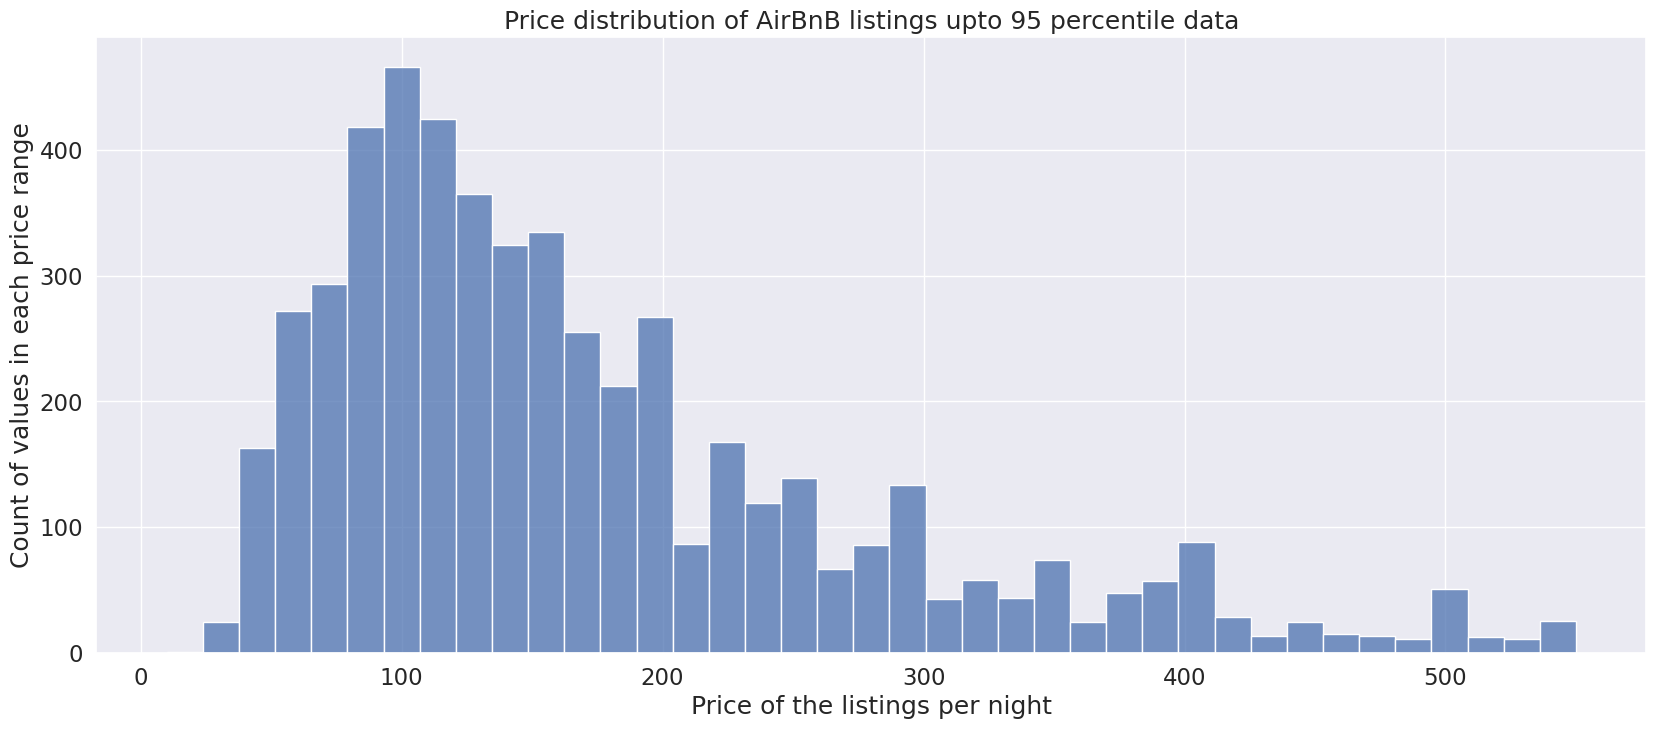

In [165]:
#Considering the 95 percentile data of price
sns.set(rc={'figure.figsize':(20,8)})
sns.set(font_scale=1.5)
sns.histplot(df[df["price_usd"]<=550]["price_usd"],kde=False)
plt.title("Price distribution of AirBnB listings upto 95 percentile data")
plt.xlabel("Price of the listings per night")
plt.ylabel("Count of values in each price range")
plt.show()

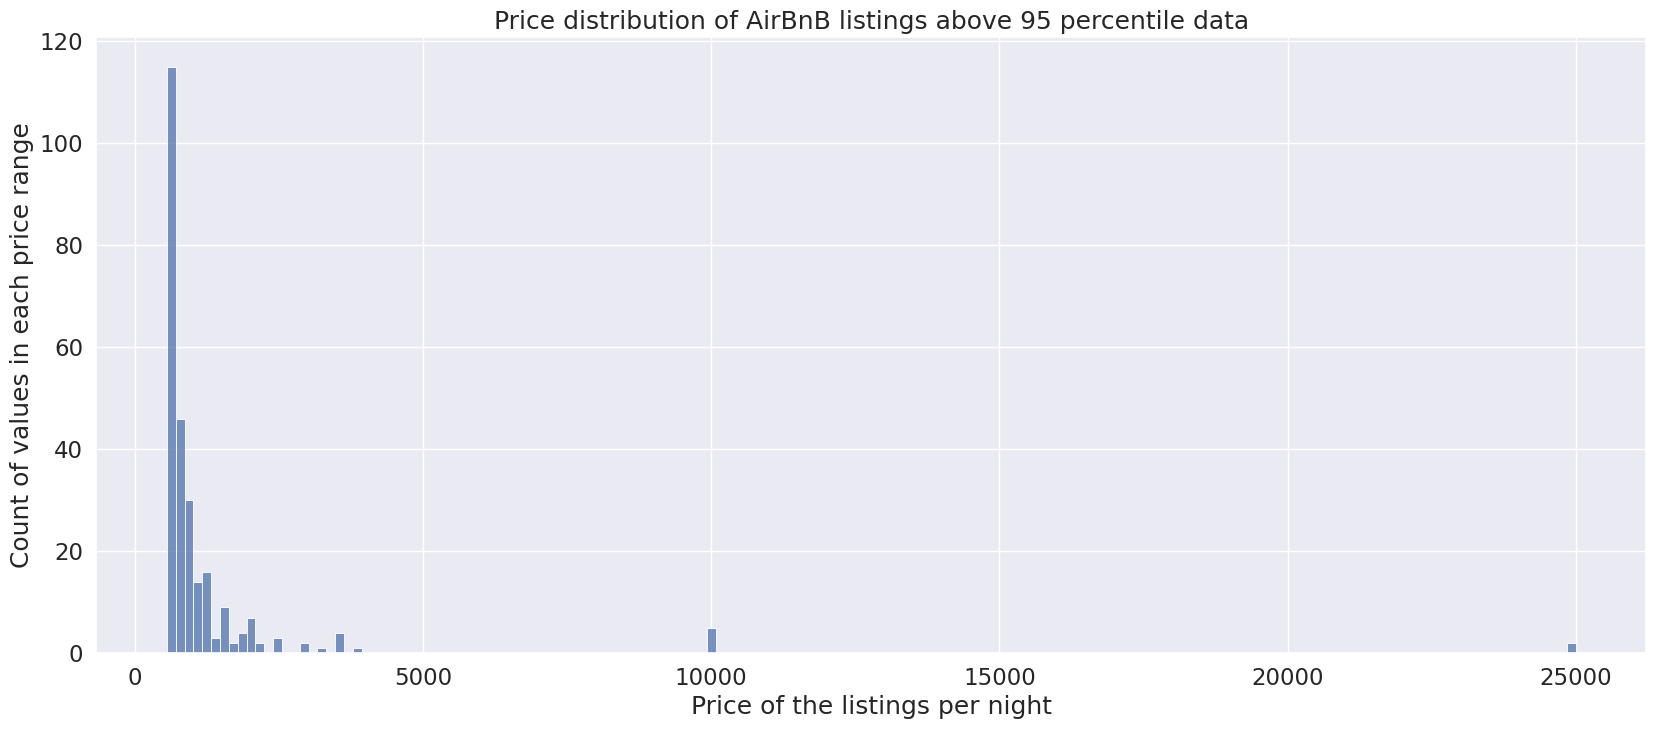

In [166]:
sns.histplot(df[df["price_usd"]>550]["price_usd"],kde=False)
plt.title("Price distribution of AirBnB listings above 95 percentile data")
plt.xlabel("Price of the listings per night")
plt.ylabel("Count of values in each price range")
plt.show()

Defining a new data frame variable data_95 with upto 95 percentile price distribution lisitngs

In [167]:
df_data_95 = df[df["price_usd"]<=np.percentile(df["price_usd"],95)]

In [168]:
df_data_95['neighbourhood_cleansed'].value_counts()

Downtown/Civic Center    624
Mission                  483
Western Addition         338
South of Market          324
Outer Sunset             264
Bernal Heights           254
Haight Ashbury           230
Castro/Upper Market      230
Nob Hill                 228
Noe Valley               189
Outer Richmond           152
Inner Richmond           148
Marina                   144
Excelsior                144
Bayview                  139
Parkside                 124
Potrero Hill             118
Inner Sunset             115
Outer Mission            103
Pacific Heights          103
Russian Hill              99
North Beach               92
Chinatown                 90
Financial District        89
West of Twin Peaks        87
Ocean View                81
Visitacion Valley         58
Glen Park                 46
Lakeshore                 45
Twin Peaks                39
Crocker Amazon            37
Presidio Heights          24
Diamond Heights            9
Presidio                   7
Seacliff      

***What's the average price of an Airbnb in San Francisco? By area?***

In [169]:
np.percentile(df_data_95["price_usd"],68)

191.0

In [170]:
np.percentile(df_data_95["price_usd"],95)

400.0

In [171]:
np.percentile(df_data_95["price_usd"],99)

503.35000000000036

In [172]:
df_data_95['price_usd'].mean() # Average price per night is $173

173.46714774022027

In [173]:
df_data_95['price_usd'].describe() # There are some strong outliers (e.g. $550 per night!)

count    5266.000000
mean      173.467148
std       106.530072
min        10.000000
25%        98.000000
50%       143.000000
75%       220.000000
max       550.000000
Name: price_usd, dtype: float64

<Axes: ylabel='Frequency'>

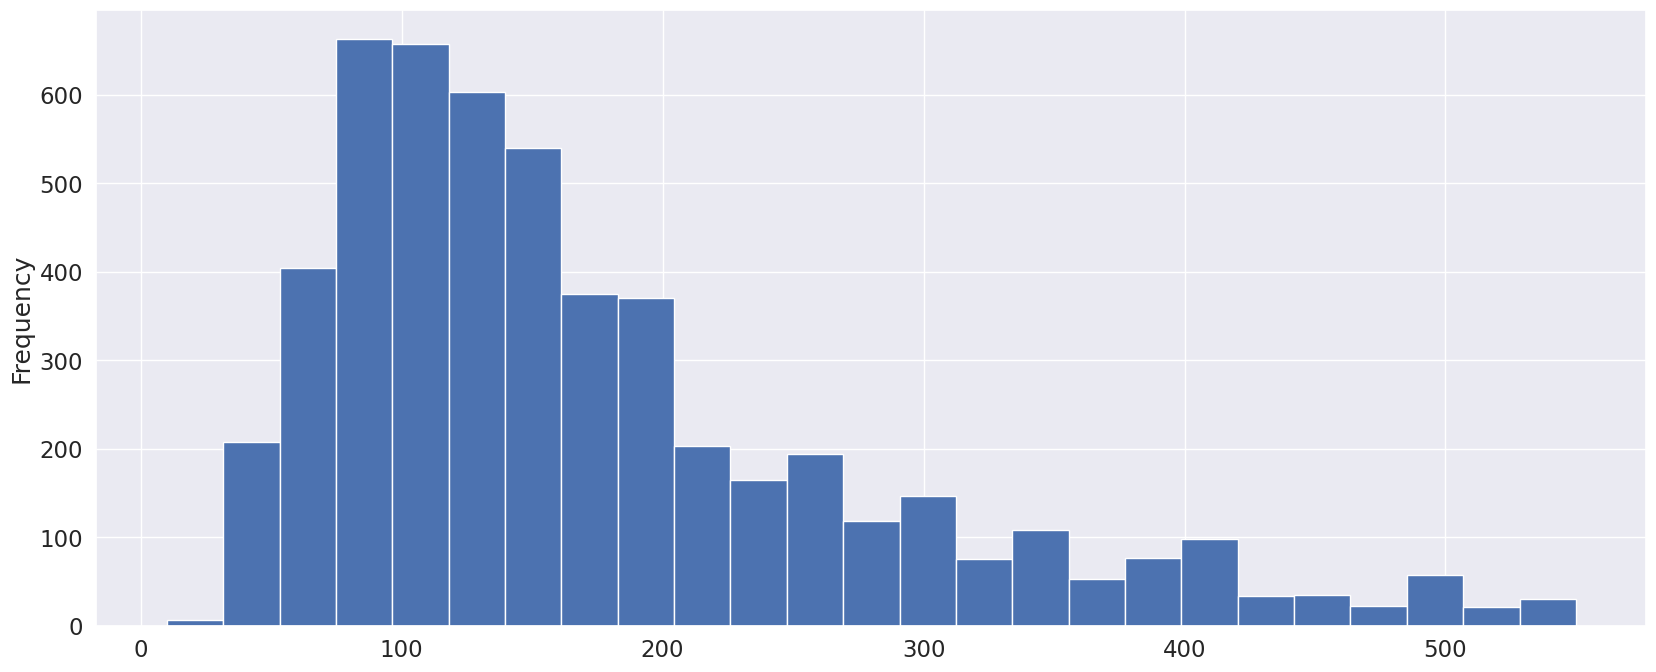

In [174]:
df_data_95['price_usd'].plot.hist(bins = 25) # I can see most listing are in the first bin

In [175]:
df_data_95.groupby('neighbourhood_cleansed')['price_usd'].mean() 

# Average price per night varies greatly between neighbourhood

neighbourhood_cleansed
Bayview                  128.812950
Bernal Heights           187.082677
Castro/Upper Market      222.930435
Chinatown                189.411111
Crocker Amazon           100.351351
Diamond Heights          220.555556
Downtown/Civic Center    165.233974
Excelsior                113.034722
Financial District       169.741573
Glen Park                218.978261
Golden Gate Park         162.333333
Haight Ashbury           187.573913
Inner Richmond           190.743243
Inner Sunset             166.539130
Lakeshore                130.911111
Marina                   197.381944
Mission                  172.621118
Nob Hill                 153.837719
Noe Valley               201.370370
North Beach              213.130435
Ocean View               109.283951
Outer Mission            141.902913
Outer Richmond           178.368421
Outer Sunset             137.401515
Pacific Heights          189.077670
Parkside                 155.241935
Potrero Hill             213.271186
Presi

***Does the 'superhost' status of host correlate with the positive rating of Airbnbs?***

In [176]:
df_data_95.groupby('host_is_superhost')['review_scores_rating'].mean() # YES, superhost are better rated!

host_is_superhost
f    4.647386
t    4.885605
Name: review_scores_rating, dtype: float64

***Does the 'superhost' status correlate with higher price per night?***

In [177]:
df_data_95.groupby('host_is_superhost')['price_usd'].mean() # YES, superhost charge more per night!

host_is_superhost
f    169.478245
t    178.090611
Name: price_usd, dtype: float64

# OTHER QUESTIONS TO EXPLORE THROUGH CORRELATIONS:

# HEATMAP & SCATTERPLOT

Q1 Does the rating/postive reviews of an Airbnb influence the price? >> ('review_scores_rating' vs 'price_usd')

Q2 Is there a correlation between positive reviews and availability? >> ('review_scores_rating' vs 'availability_30' & 'availability_60' & 'availability_90' & 'availability_365')

Q3 Is there a correlation between host response rate and availability? >> ('host_resp_rate_pct' vs 'availability_30' & 'availability_60' & 'availability_90' & 'availability_365')

Q4 Is there a correlation between host acceptance rate and availability? >> ('host_accept_rate_pct' vs 'availability_30' & 'availability_60' & 'availability_90' & 'availability_365')

Q5 Is there a correlation between host acceptance rate and reviews? >> ('host_accept_rate_pct' vs 'review_scores_rating')

# PAIR PLOT

What is the max & min amount of listings owned by hosts? What's the average?

***5. Exploring Relationships***

***A. HEATMAP & SCATTERPLOTS (correlations in general)***

In [178]:
# Creating a subset to look at correlation in general

sub = df_data_95[['host_response_time', 'host_resp_rate_pct', 'host_accept_rate_pct', 'host_is_superhost',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'price_usd', 'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']]

<ipython-input-179-2e8e6c8bfbc7>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(sub.corr(), annot = True, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), ax = ax)


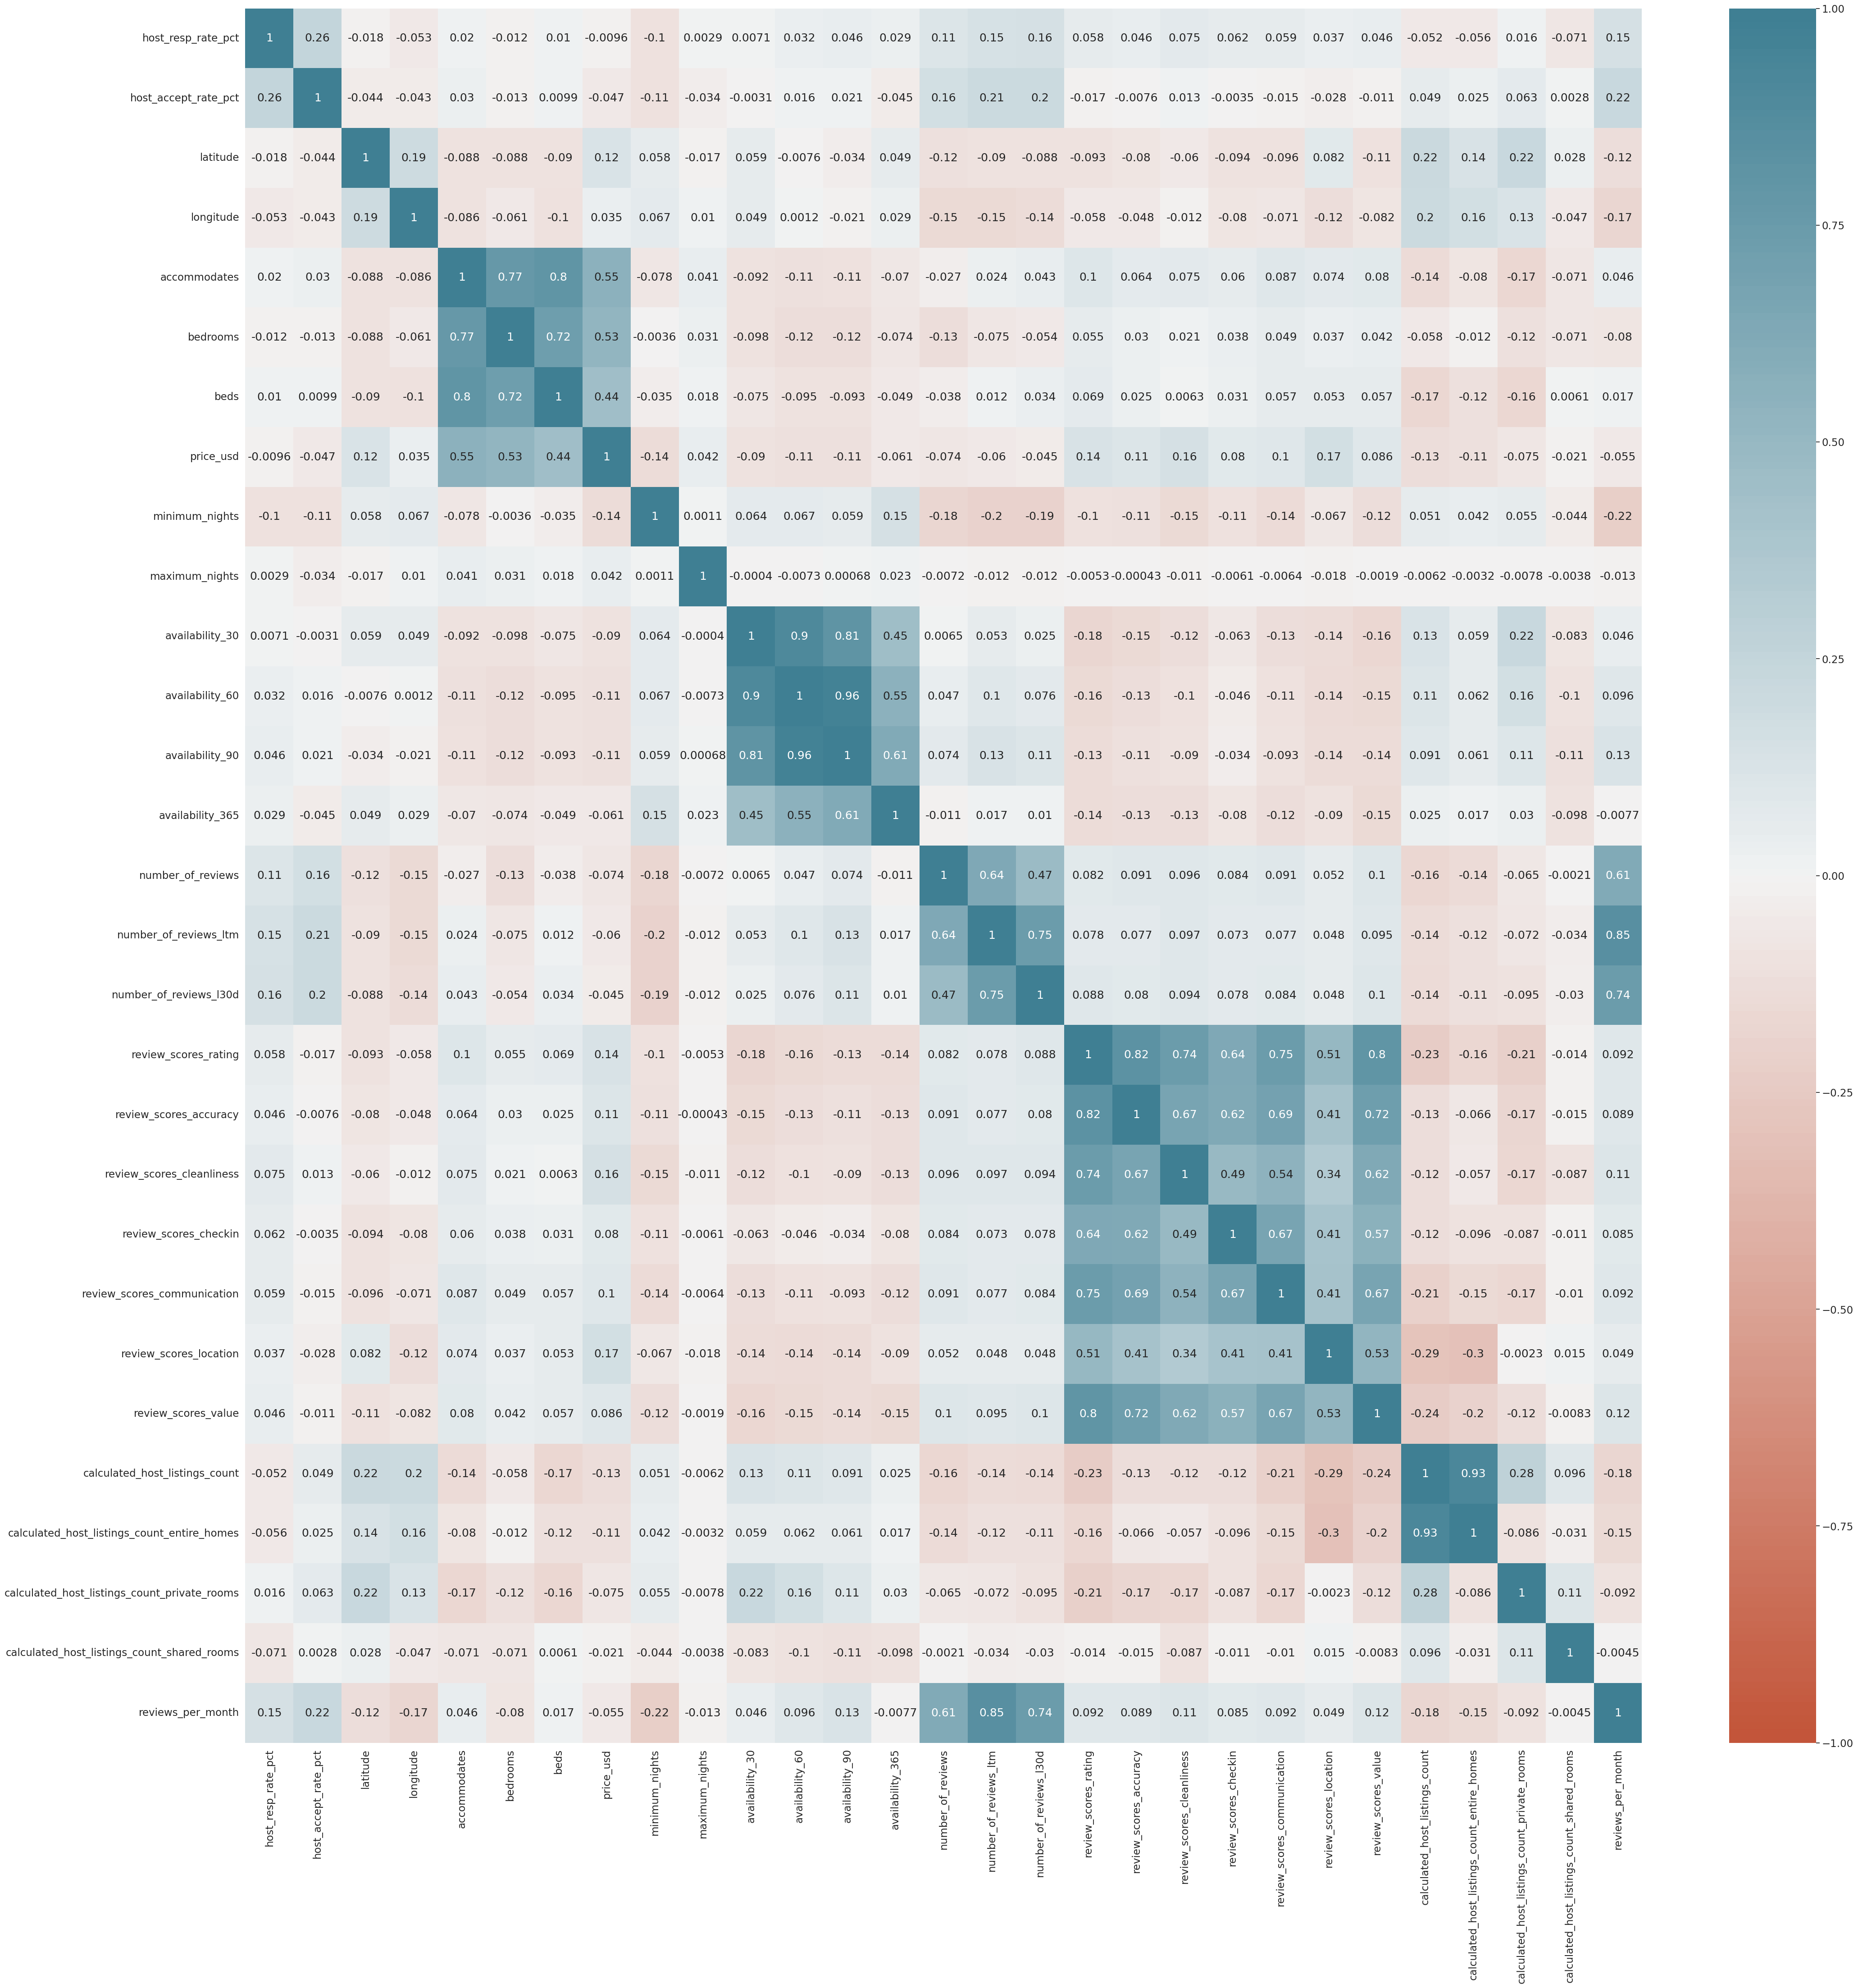

In [179]:
# Creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(50,50))

# Creating a correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), ax = ax) 

# COMMENTS ABOUT THE GENERAL HEATMAP

***When looking at the whole dataframe, I cannot see many strong correlations, which I guess could be expected considering the high number of variables.***

***There are "clusters" of positive correlations, such as:***
1. Accomodates (Number of Guests) and: Bedrooms [0.77, very strong postive], Beds [0.8, very strong positive], Price [0.55, strong positive]

2. Availability status 30, 60, 90, 365 (which makes sense)

3. There's a weak but postive correlation between availability status and number of reviews received

4. There's a cluster of postive correlation between the review breakdown, indicating that postive reviews tend to be about all aspects of the airbnb

# STRONGEST CORRELATION
One of the strongest correlation is accomodates vs bedrooms and beds. It makes sense as the more people an Airbnb can accomodate, the more rooms we'd expect it to have (and the more beds).

On the scatterplot below, we can see there are some strange outliers; for example bottom right there are a few listings that have only a couple of rooms which can accomodate 14-16 people.

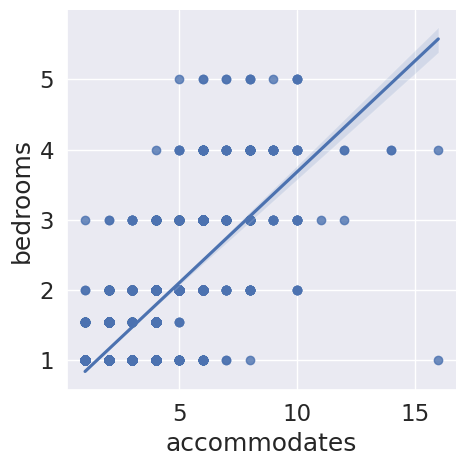

In [180]:
# Scatterplot accomodates vs bedrooms (strong correlation)

sns.lmplot(x = 'accommodates', y = 'bedrooms', data = df_data_95)

***B. HEATMAP & SCATTERPLOTS (correlation related to my questions)***

In [181]:
# Creating a subset to look at correlations related to my questions

sub1 = df_data_95[['review_scores_rating', 'price_usd', 'host_resp_rate_pct',
           'host_accept_rate_pct', 'availability_30', 'availability_60', 
           'availability_90', 'availability_365']]

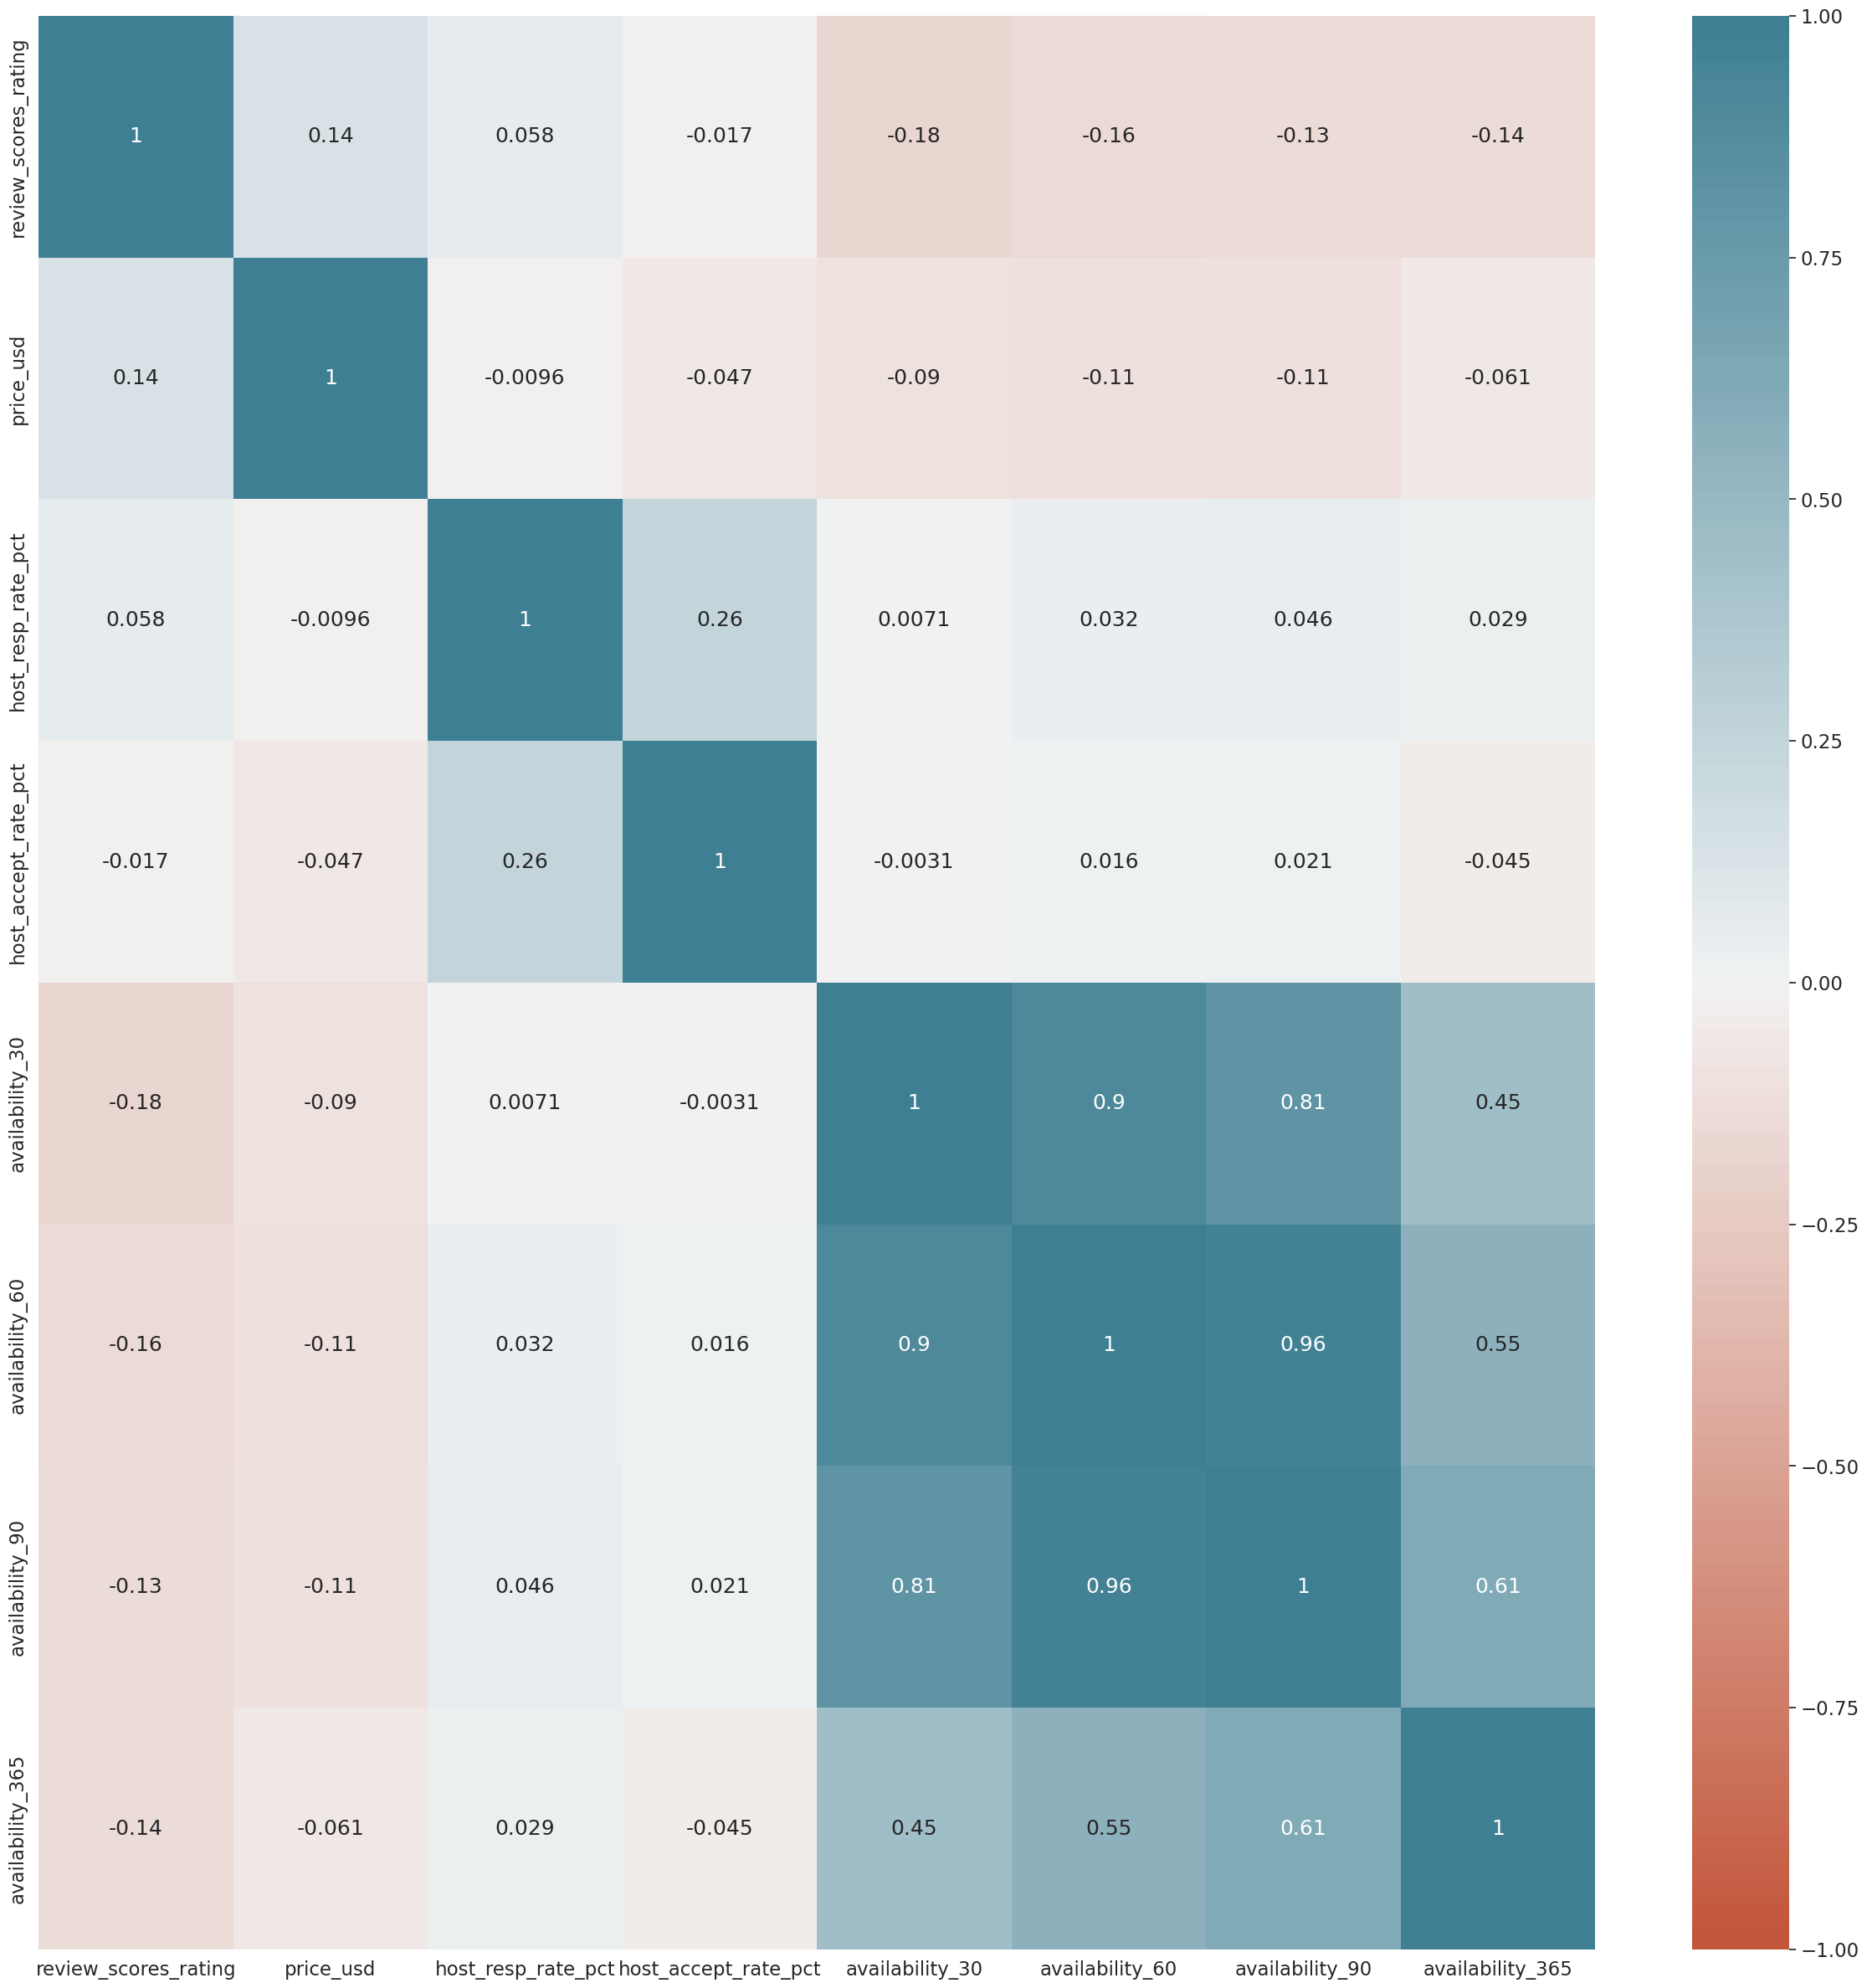

In [182]:
# Creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(30,30))

# Creating a correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub1.corr(), annot = True, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), ax = ax)

# HEATMAP Q1

Q1: Does the rating/postive reviews of an Airbnb influence the price? >> ('review_scores_rating' vs 'price_usd')

***A1: According to the heatmap, no, which is surprising. Looking at the scatterplot below however, I feel like further investigation is needed. because it does look like there's a correlation. The 0 reviews might be skewing the results and are probably "new listings" rather than true 0 (as host would not be able to rent property surely). All these was true when I was using df dataaframe but now I am using df_data_95 with 95% percentile of price data and max price is 550***

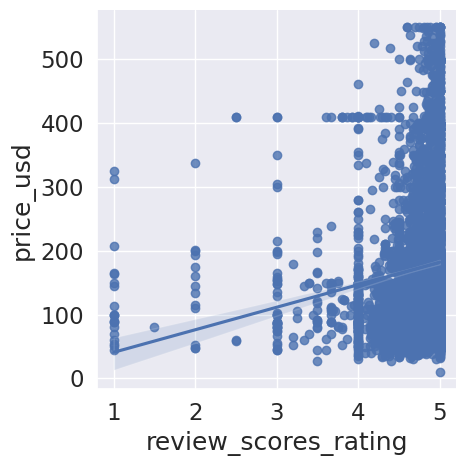

In [184]:
# Scatterplot related to my Q1

sns.lmplot(x = 'review_scores_rating', y = 'price_usd', data = df_data_95)

<Axes: ylabel='Frequency'>

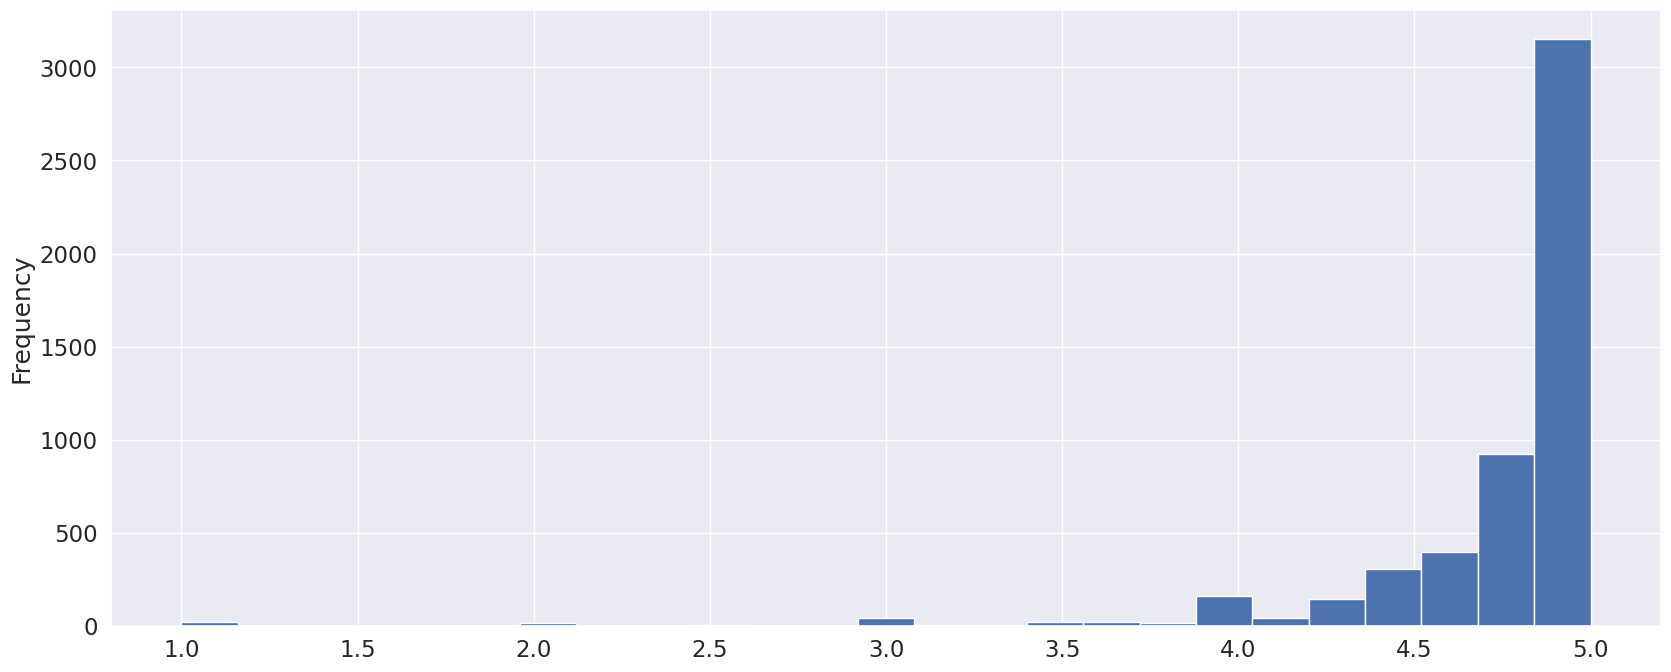

In [185]:
df_data_95['review_scores_rating'].plot.hist(bins = 25)

In [186]:
df_data_95['review_scores_rating'].describe()

# Most reviews are above 4.7, I will derivate a new column in a future script to explore this further

count    5266.000000
mean        4.757719
std         0.423790
min         1.000000
25%         4.710000
50%         4.890000
75%         5.000000
max         5.000000
Name: review_scores_rating, dtype: float64

# HEATMAP Q2

Q2: Is there a correlation between positive reviews and availability? >> ('review_scores_rating' vs 'availability_30' & 'availability_60' & 'availability_90' & 'availability_365')

***A2: The correlation is very weak but I can see that the better the rating, the less listings are available.***

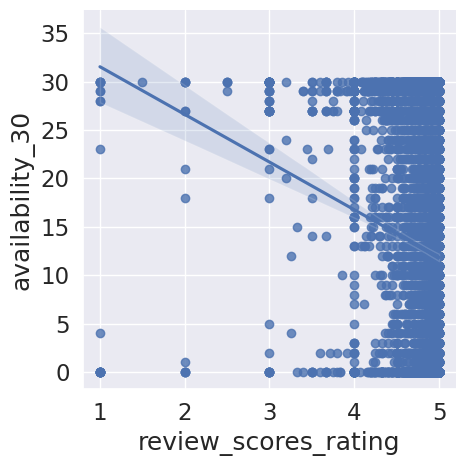

In [187]:
sns.lmplot(x = 'review_scores_rating', y = 'availability_30', data = df_data_95)

# HEATMAP Q3

Q3: Is there a correlation between host response rate and availability? >> ('host_resp_rate_pct' vs 'availability_30' & 'availability_60' & 'availability_90' & 'availability_365')

***A3: There is a slight negative correlation between host reponse rate and availability; this mean the more responsive the host is, the less available the listing is available.***

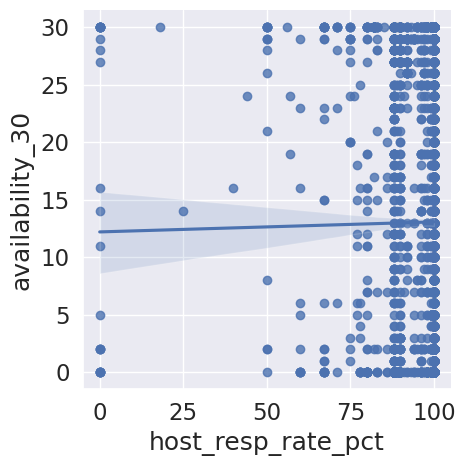

In [188]:
sns.lmplot(x = 'host_resp_rate_pct', y = 'availability_30', data = df_data_95)

# HEATMAP Q4

Q4: Is there a correlation between host acceptance rate and availability? >> ('host_accept_rate_pct' vs 'availability_30' & 'availability_60' & 'availability_90' & 'availability_365')

***A4: Yes, but not enough to be relevant***

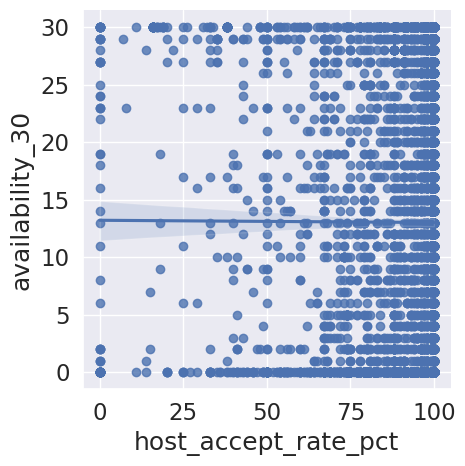

In [189]:
sns.lmplot(x = 'host_accept_rate_pct', y = 'availability_30', data = df_data_95)

# HEATMAP Q5

Q5: Is there a correlation between host acceptance rate and reviews? >> ('host_accept_rate_pct' vs 'review_scores_rating')

***A5: No***

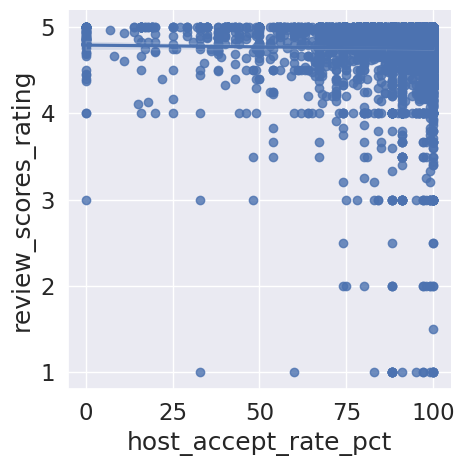

In [190]:
sns.lmplot(x = 'host_accept_rate_pct', y = 'review_scores_rating', data = df_data_95)

# C. PAIR PLOTS

Please note: Even though the exercise calls to create a pair plot of the entire dataset, doing so crashes my computer as the dataset has so many columns. I am therefore creating subsets to explore the data through multiple pair plots.

In [191]:
# PAIR PLOT 1 - Keeping only some variables

sub_pp1 = df_data_95[['accommodates', 'bedrooms', 'beds', 'price_usd']]

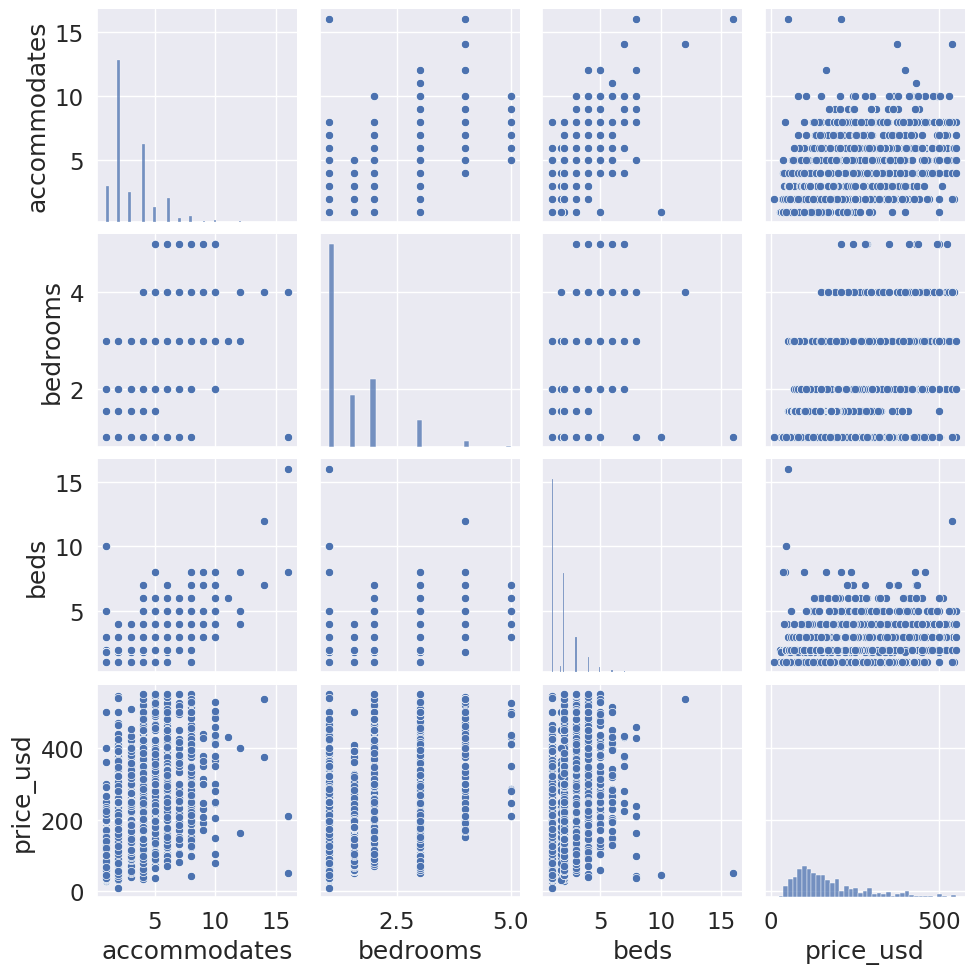

In [192]:
# Creating pair plot 1

g = sns.pairplot(sub_pp1)

In [193]:
df_data_95['accommodates'].max()

16

## ***COMMENT: On PP1 I can see that apart from a few strong outliers, most of the data is within the same range (e.g.: most price < $5000, most bed < 12, most bedrooms <8). Moreover, I feel like Airbnb must have a limit on how many people a listing can accomodate, as the maximum is 16. All these was true when I was using df dataaframe but now I am using df_data_95 with 95% percentile of price data and max price is 550***

## ***COMMENT: But now using df_data_95 I can see that most of the data is within the same range (e.g.: most price < $550, most bed < 12, most bedrooms <8). Moreover, I feel like Airbnb must have a limit on how many people a listing can accomodate, as the maximum is 16.***

In [194]:
# PAIR PLOT 2 - Keeping only some variables

sub_pp2 = df_data_95[['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 
              'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
              'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
              'review_scores_value', 'reviews_per_month']]

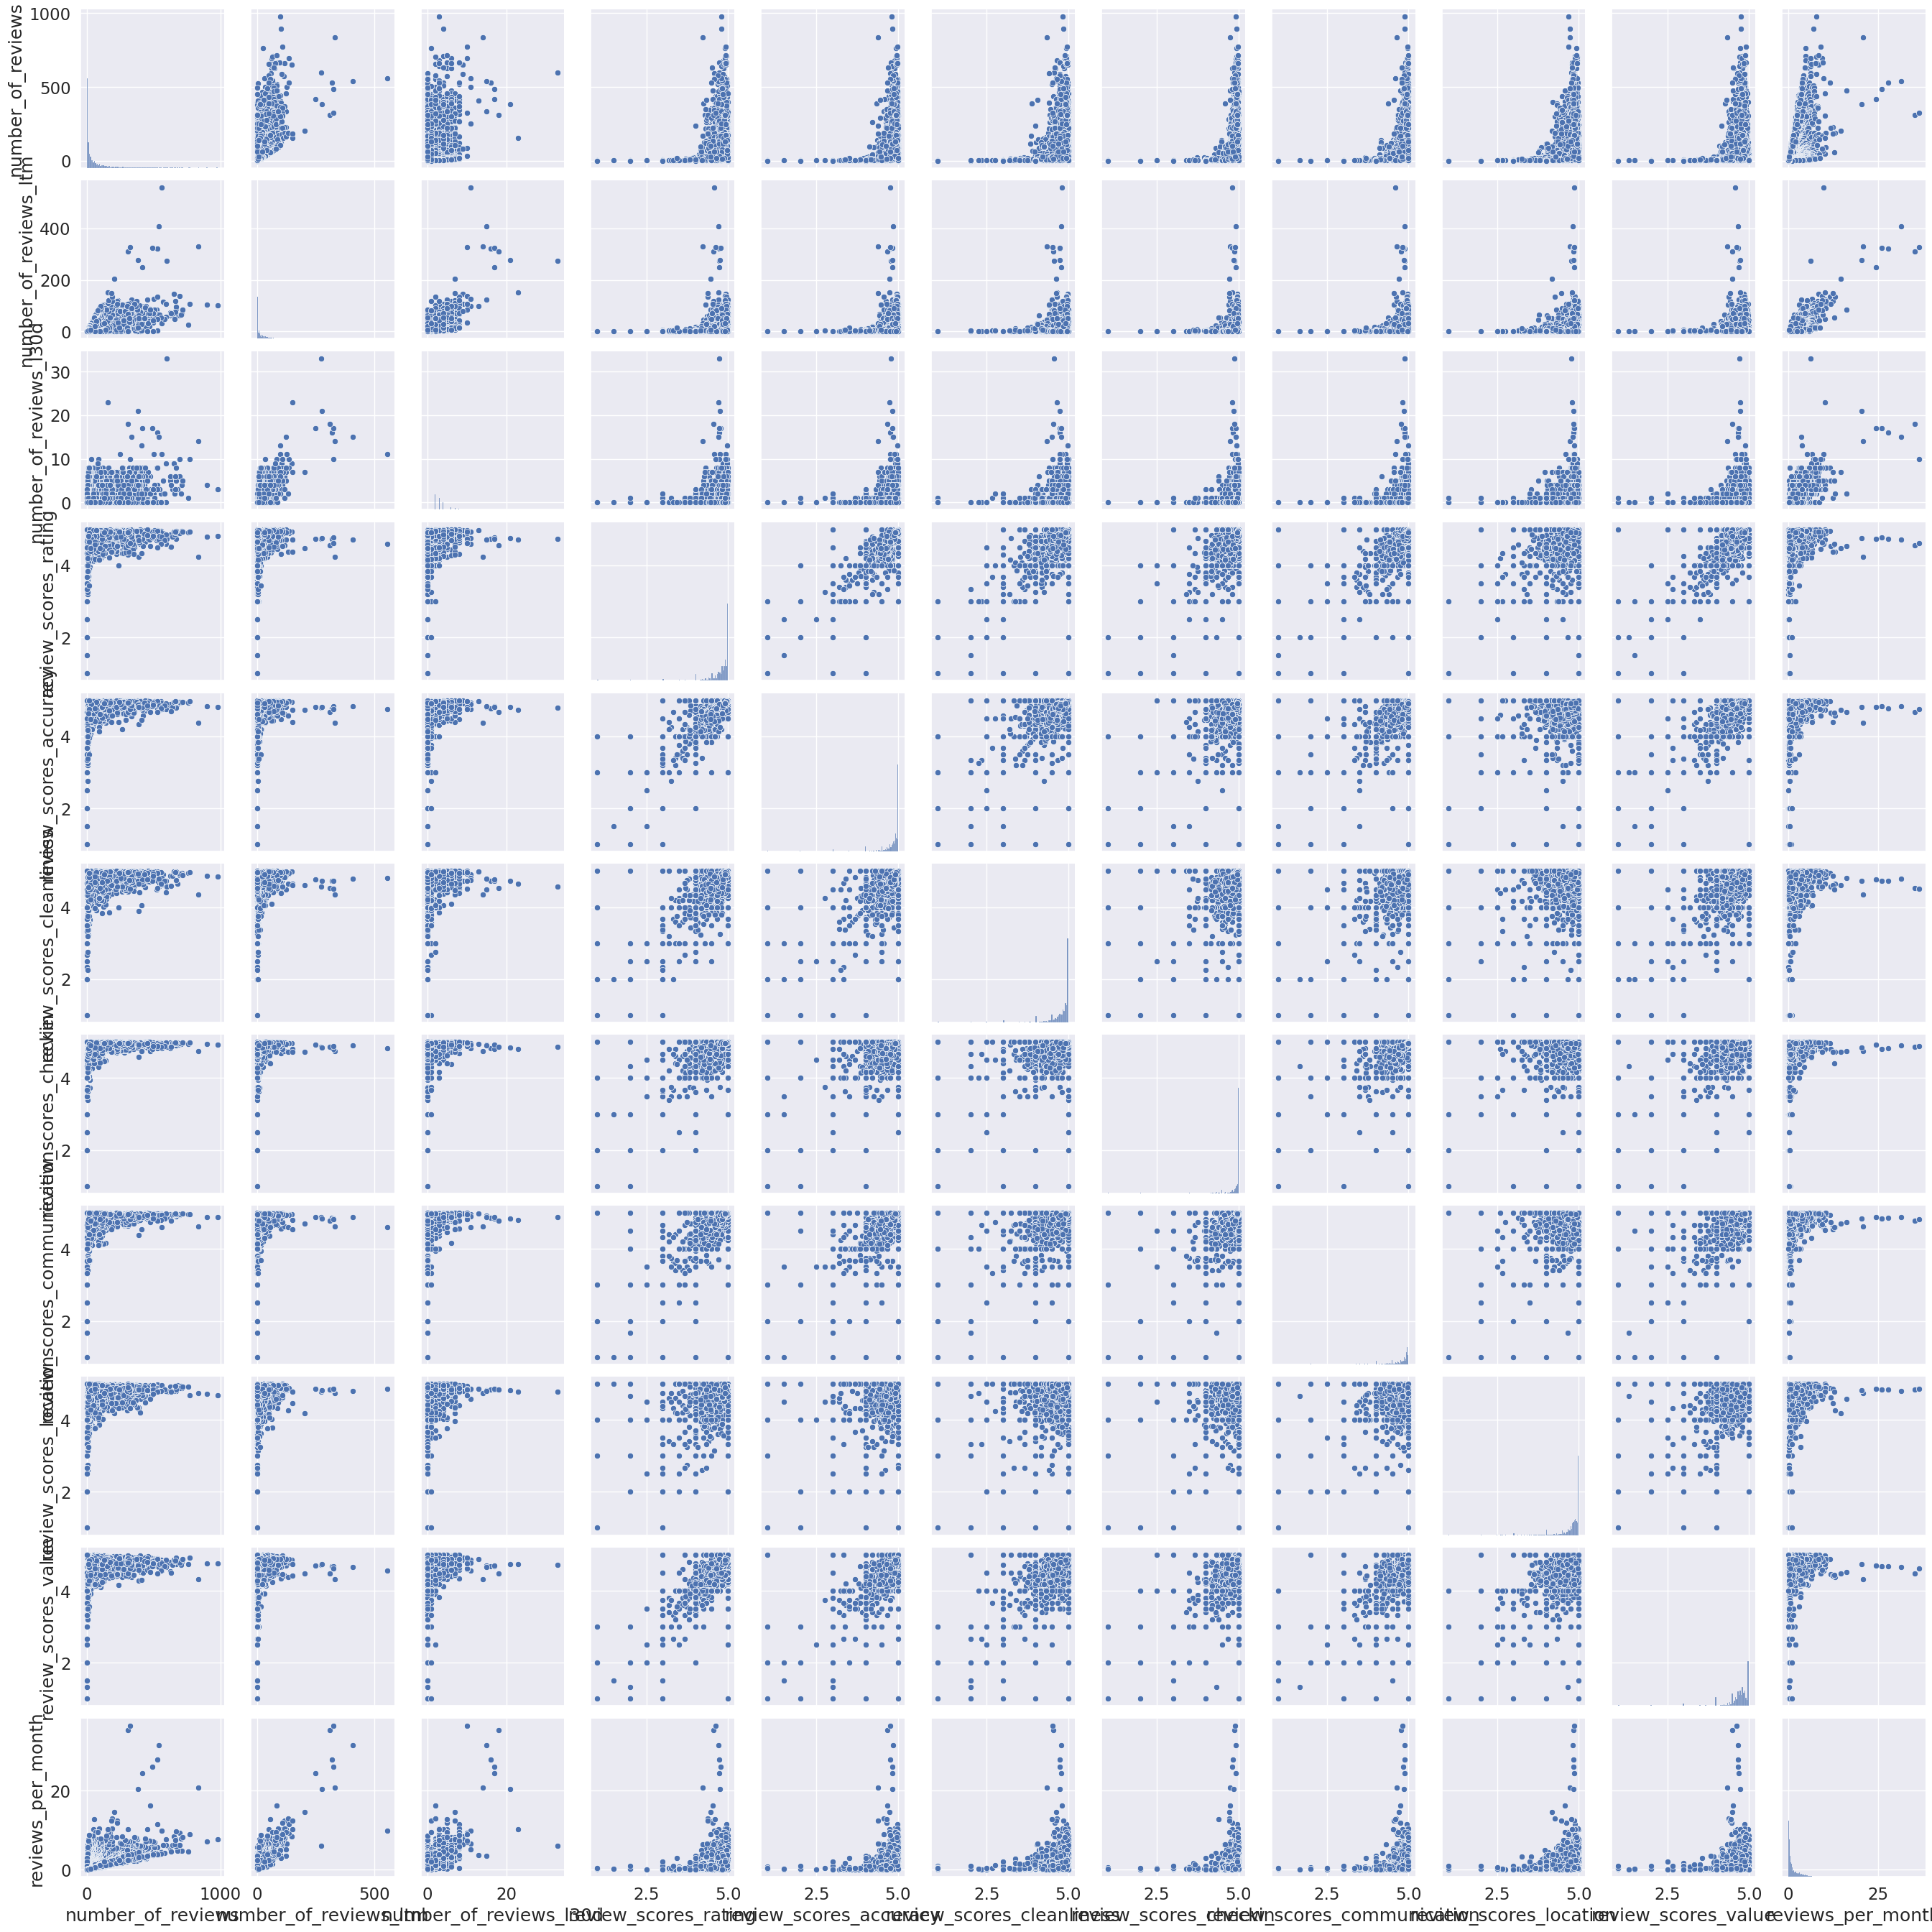

In [195]:
# Creating pair plot 2

g = sns.pairplot(sub_pp2)

## ***COMMENT: On PP2 I can also see that apart from a few strong outliers, most of the data is within the same range. Particularly the review scores are very similar to one another, so as noted previously I understand as "if guest are happy they are generally happy about all aspects of the Airbnb".***

In [196]:
df_data_95.columns

Index(['id', 'host_id', 'host_since', 'host_response_time',
       'host_resp_rate_pct', 'host_accept_rate_pct', 'host_is_superhost',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'price_usd', 'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_

In [197]:
# PAIR PLOT 3 - Keeping only some variables

sub_pp3 = df_data_95[['minimum_nights', 'calculated_host_listings_count',
              'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 
              'calculated_host_listings_count_shared_rooms']]

In [198]:
# Renaming columns to create a redable pair plot

sub_pp3.rename(columns = {'calculated_host_listings_count' : 'host_cnt_list', 
                          'calculated_host_listings_count_entire_homes' : 'host_cnt_homes',
                         'calculated_host_listings_count_private_rooms' : 'host_cnt_pvt_rooms',
                         'calculated_host_listings_count_shared_rooms' : 'host_cnt_shd_rooms'}, inplace = True)

<ipython-input-198-260e50d78740>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_pp3.rename(columns = {'calculated_host_listings_count' : 'host_cnt_list',


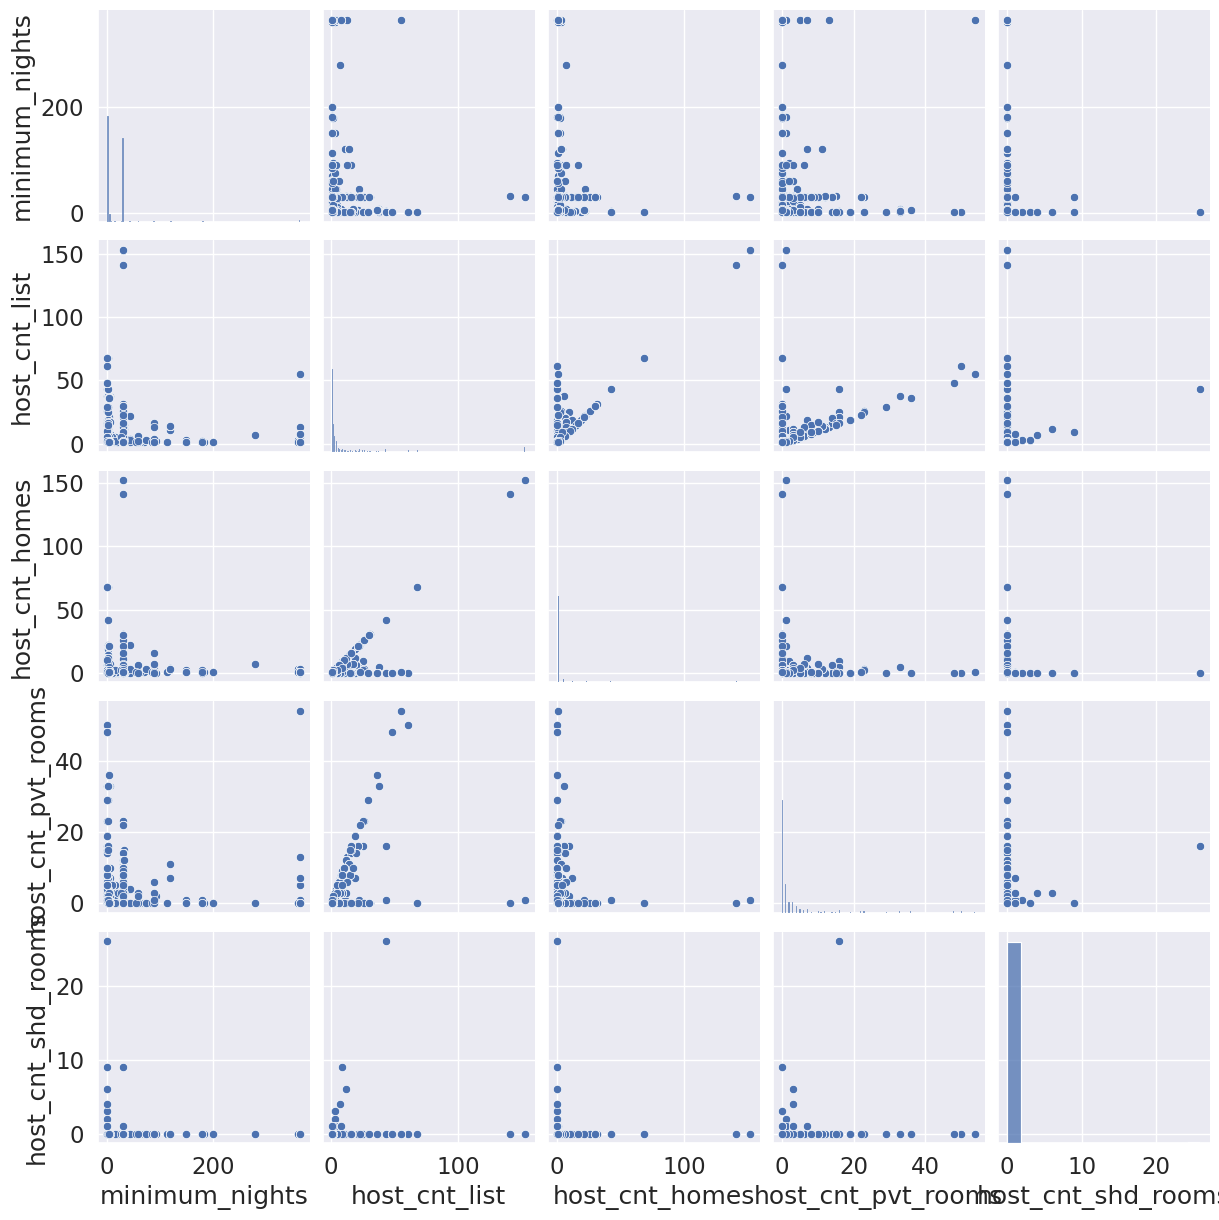

In [199]:
# Creating pair plot 3

g = sns.pairplot(sub_pp3)

In [200]:
sub_pp3[['host_cnt_list','host_cnt_homes','host_cnt_pvt_rooms','host_cnt_shd_rooms']].describe()

host_cnt_list  host_cnt_homes  host_cnt_pvt_rooms  host_cnt_shd_rooms
count     5266.00000     5266.000000         5266.000000         5266.000000
mean        12.07387        7.922522            3.704520            0.244208
std         27.98810       26.915634            9.207023            2.356456
min          1.00000        0.000000            0.000000            0.000000
25%          1.00000        0.000000            0.000000            0.000000
50%          2.00000        1.000000            0.000000            0.000000
75%          7.00000        2.000000            3.000000            0.000000
max        153.00000      152.000000           54.000000           26.000000

## ***COMMENT: On PP3, I can see that a few hosts have many more listings than the average. For example, one host has 100+ listings, when 75% of hosts have 7 or less. Likewise for all other categories. It will be interesting to separate the dataset into "normal" vs "outlier" hosts, to really dig deeper into trends amongst the normal host (75%) and isolate "greedy" Airbnb users (who are probably breaking many laws by having so many listings..).***

# ***D. CATEGORICAL PLOTS***

***CATEGORICAL PLOT 1***

<Axes: xlabel='room_type', ylabel='Count'>

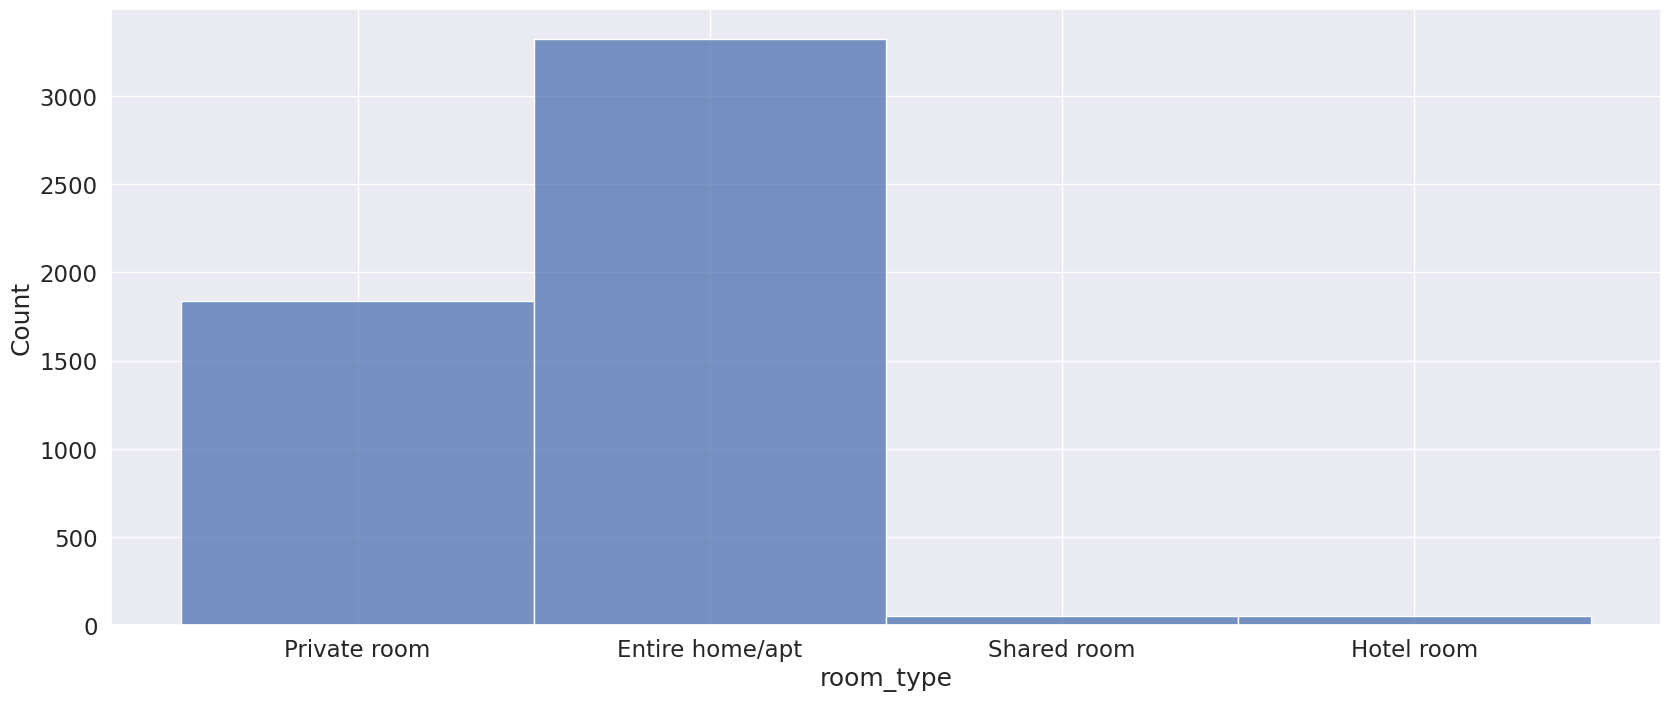

In [201]:
# Categorical Plot 1 - looking at trend in room type
# Most listings are for entire homes, followed closely by private rooms; 
# Hotel rooms & shared rooms are not popular at all. 

sns.histplot(df_data_95['room_type'], bins = 4)

In [202]:
# Categorical Plot 1 - the values

df_data_95['room_type'].value_counts()

Entire home/apt    3325
Private room       1835
Hotel room           54
Shared room          52
Name: room_type, dtype: int64

***CATEGORICAL PLOT 2***

<Axes: xlabel='host_response_time', ylabel='Count'>

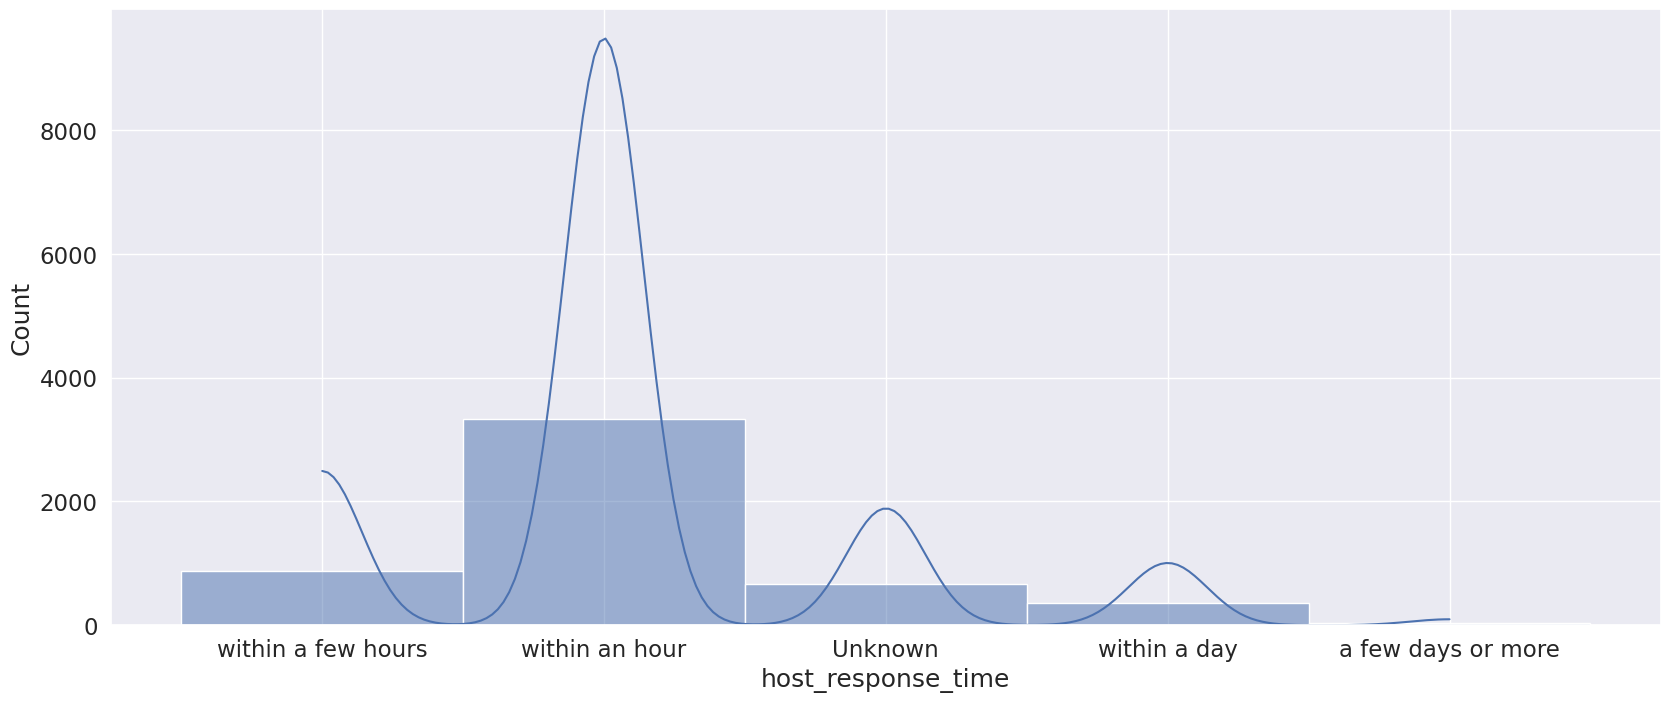

In [203]:
# Categorical Plot 2 - looking at trends in response time
# Mostly the data for this is within an hour, so, most hosts respond within the hour
# If not within the hour, hosts usualy reply within a few hours or within a day. 

sns.histplot(df_data_95['host_response_time'], bins = 10, kde = True)

In [204]:
# Categorical Plot 2 - the values

df_data_95['host_response_time'].value_counts()

within an hour        3337
within a few hours     877
Unknown                664
within a day           354
a few days or more      34
Name: host_response_time, dtype: int64

***CATEGORICAL PLOT 3***

<Axes: xlabel='review_scores_rating', ylabel='Count'>

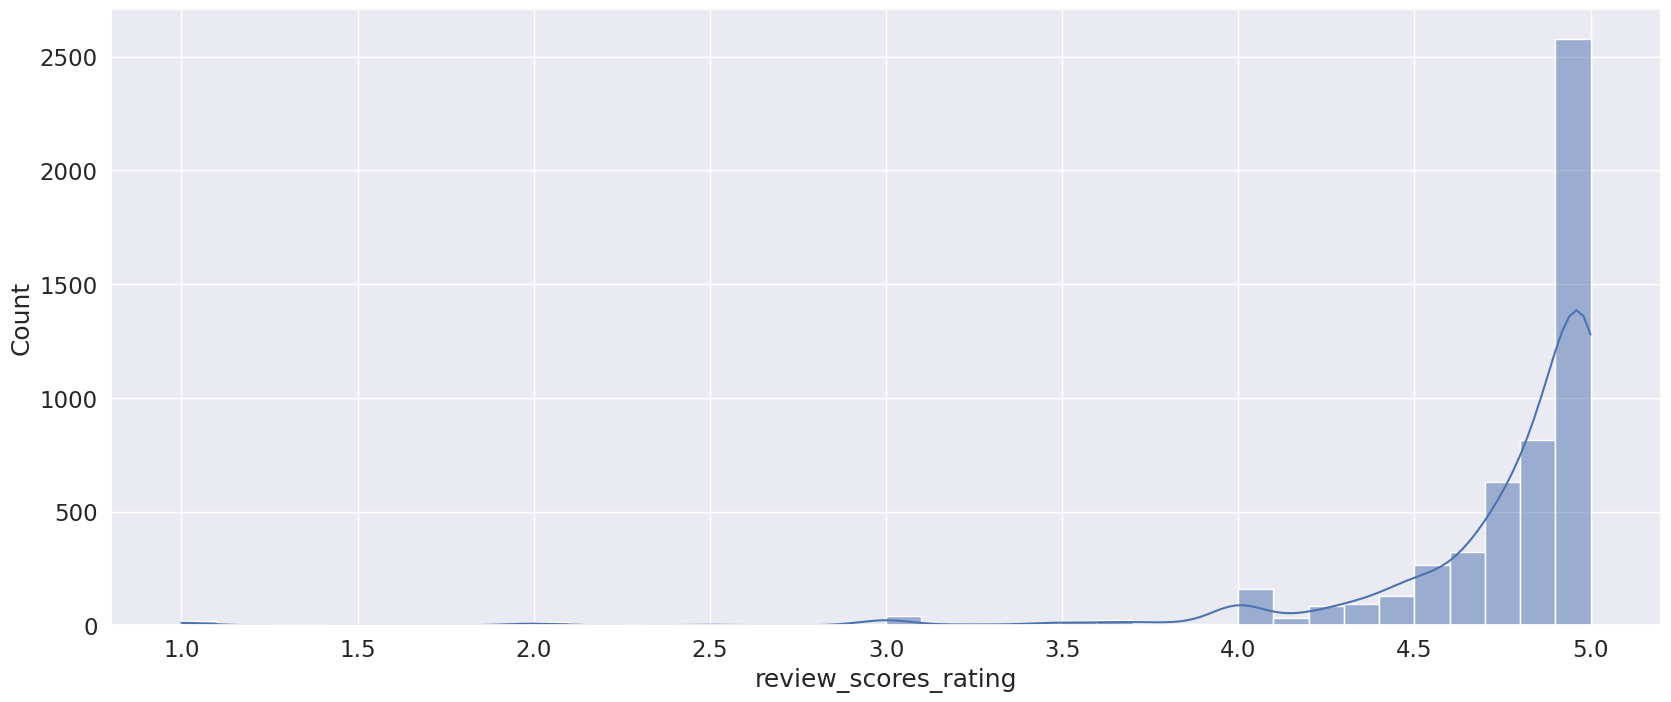

In [205]:
# Most reviews lie between 4.5-5 stars, particulalry the exact number 4.9 & 5 stars. 

sns.histplot(df_data_95['review_scores_rating'], bins = 40, kde = True)

***CATEGORICAL PLOT 4***

<Axes: xlabel='price_usd', ylabel='Count'>

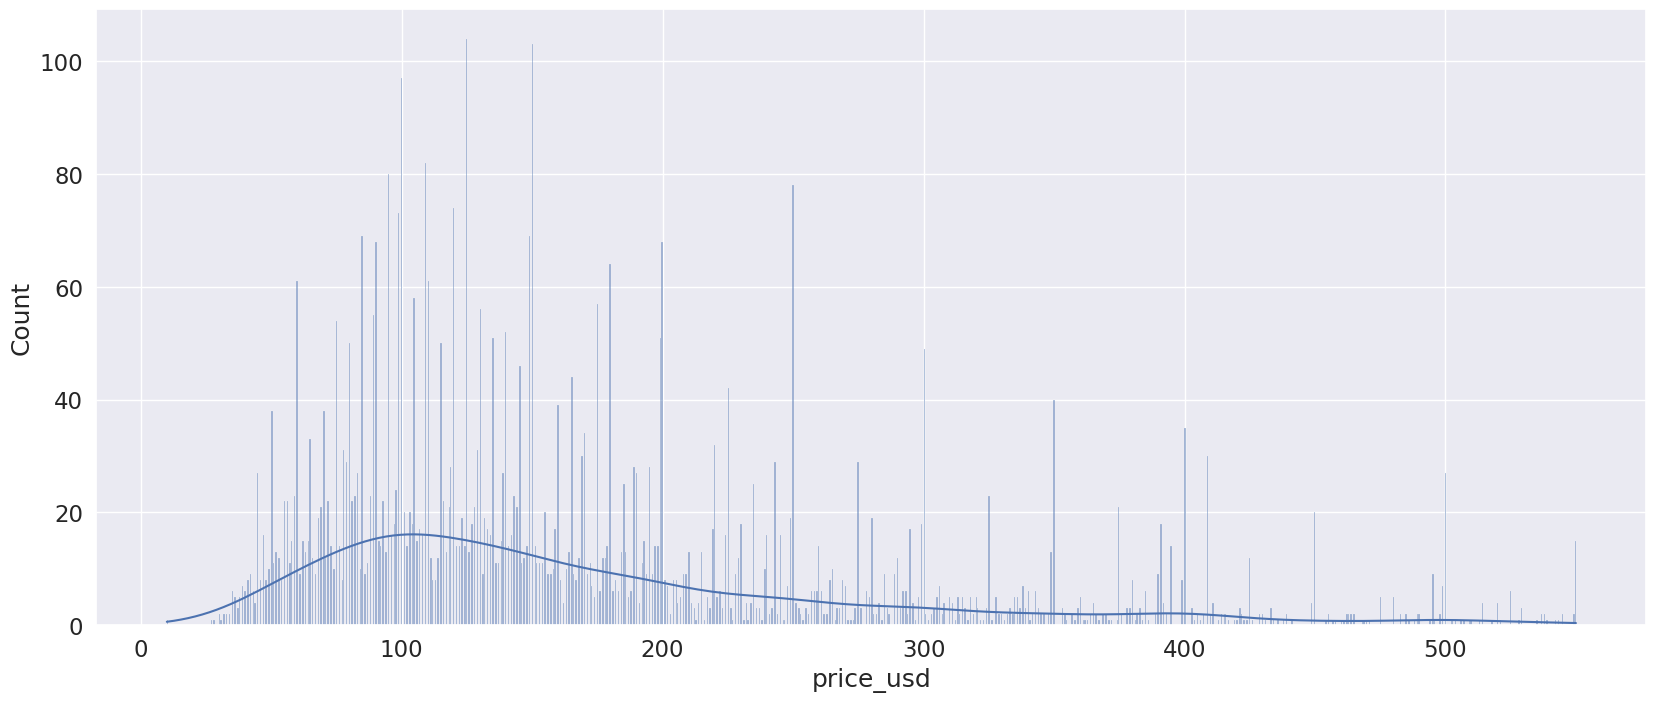

In [206]:
# Looking at prices, the outliers are making it difficult to see

sns.histplot(df_data_95['price_usd'], bins = 1000, kde = True)

In [207]:
df_data_95.price_usd.describe()

count    5266.000000
mean      173.467148
std       106.530072
min        10.000000
25%        98.000000
50%       143.000000
75%       220.000000
max       550.000000
Name: price_usd, dtype: float64

In [209]:
# Dropping the outliers

df_price_b500 = df_data_95.drop(df_data_95[(df_data_95['price_usd'] > 500)].index)

In [210]:
df_price_b500.describe()

id       host_id  host_resp_rate_pct  host_accept_rate_pct  \
count  5.211000e+03  5.211000e+03         5211.000000           5211.000000   
mean   8.438279e+16  9.296931e+07           96.304164             89.015544   
std    2.185265e+17  1.266366e+08            9.290791             18.492587   
min    9.580000e+02  1.169000e+03            0.000000              0.000000   
25%    1.405086e+07  5.058722e+06           97.000000             88.000000   
50%    3.118824e+07  2.893231e+07          100.000000             97.000000   
75%    4.905253e+07  1.312004e+08          100.000000            100.000000   
max    7.669620e+17  4.873070e+08          100.000000            100.000000   

          latitude    longitude  accommodates     bedrooms         beds  \
count  5211.000000  5211.000000   5211.000000  5211.000000  5211.000000   
mean     37.766044  -122.431738      2.997505     1.465179     1.707043   
std       0.023300     0.028177      1.673261     0.685413     1.049201   
min      37.708370  -122.511360      1.000000     1.000000     1.000000   
25%      37.750060  -122.444900      2.000000     1.000000     1.000000   
50%      37.769340  -122.424100      2.000000     1.000000     1.000000   
75%      37.786325  -122.410815      4.000000     2.000000     2.000000   
max      37.809540  -122.358480     16.000000     5.000000    16.000000   

         price_usd  minimum_nights  maximum_nights  availability_30  \
count  5211.000000     5211.000000     5211.000000      5211.000000   
mean    169.686624       18.917674      630.237191        13.093648   
std     100.484335       38.806305    13856.323833        11.652818   
min      10.000000        1.000000        1.000000         0.000000   
25%      98.000000        2.000000       29.000000         0.000000   
50%     141.000000        4.000000      180.000000        12.000000   
75%     218.000000       30.000000     1125.000000        26.000000   
max     500.000000      365.000000   999999.000000        30.000000   

       availability_60  availability_90  availability_365  number_of_reviews  \
count      5211.000000      5211.000000       5211.000000        5211.000000   
mean         29.348685        47.494915        170.761466          61.636154   
std          22.198915        33.489835        129.179426         103.609540   
min           0.000000         0.000000          0.000000           1.000000   
25%           5.000000        11.000000         51.000000           4.000000   
50%          31.000000        54.000000        161.000000          16.000000   
75%          51.000000        80.000000        301.500000          71.000000   
max          60.000000        90.000000        365.000000         977.000000   

       number_of_reviews_ltm  number_of_reviews_l30d  review_scores_rating  \
count            5211.000000             5211.000000           5211.000000   
mean               13.416043                0.857417              4.756408   
std                25.359920                1.750627              0.425519   
min                 0.000000                0.000000              1.000000   
25%                 1.000000                0.000000              4.710000   
50%                 3.000000                0.000000              4.890000   
75%                16.000000                1.000000              5.000000   
max               558.000000               33.000000              5.000000   

       review_scores_accuracy  review_scores_cleanliness  \
count             5211.000000                5211.000000   
mean                 4.811518                   4.763255   
std                  0.392177                   0.412661   
min                  1.000000                   1.000000   
25%                  4.800000                   4.700000   
50%                  4.930000                   4.910000   
75%                  5.000000                   5.000000   
max                  5.000000                   5.000000   

       review_scores_che

<Axes: xlabel='price_usd', ylabel='Count'>

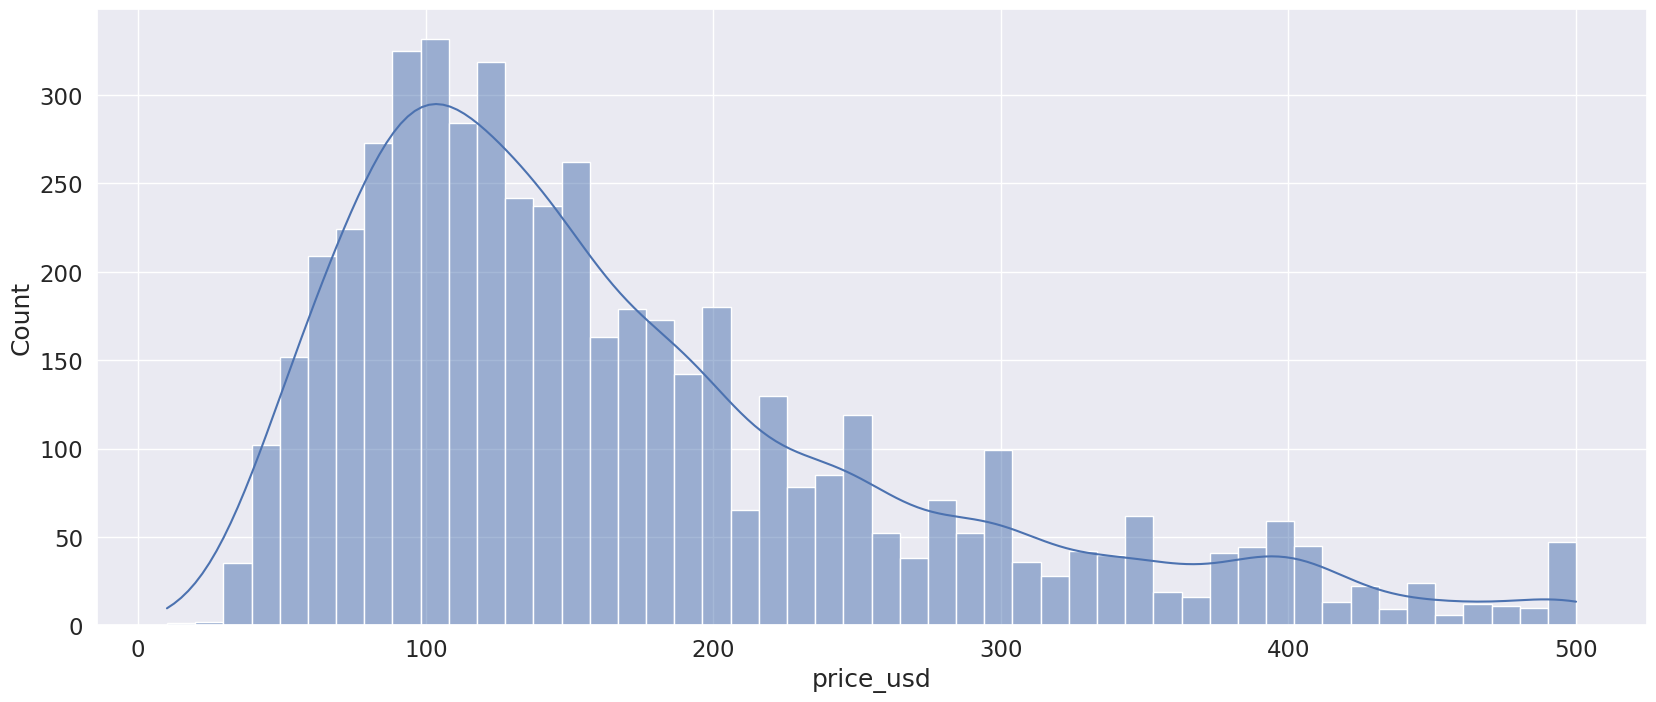

In [212]:
# Here I can see that most listing are below $220 a night. 

sns.histplot(df_price_b500['price_usd'], bins = 50, kde = True)

## ***CATEGORICAL PLOT 5***

***Preparing the data***

In [213]:
df_data_95.loc[df_data_95['review_scores_rating'] < 3.5, 'review_category'] = 'bad'

<ipython-input-213-ebaf7b5d021e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_95.loc[df_data_95['review_scores_rating'] < 3.5, 'review_category'] = 'bad'


In [214]:
df_data_95.loc[(df_data_95['review_scores_rating'] >= 3.5) & (df_data_95['review_scores_rating'] <= 4.4), 'review_category'] = 'average'

In [215]:
df_data_95.loc[df_data_95['review_scores_rating'] > 4.4, 'review_category'] = 'excellent'

In [216]:
df_data_95['review_category'].value_counts(dropna = False)

excellent    4712
average       463
bad            91
Name: review_category, dtype: int64

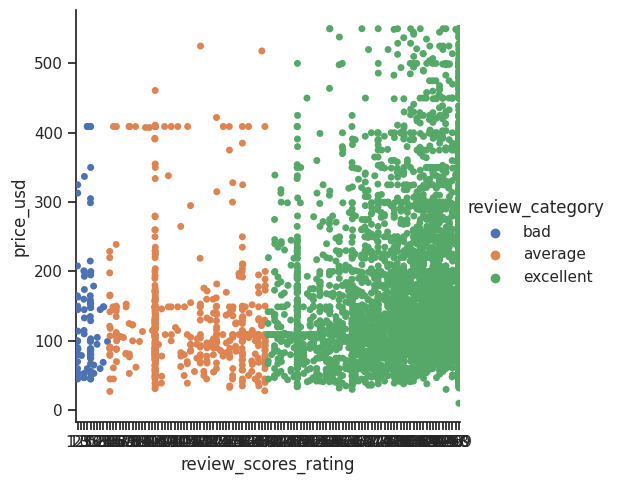

In [217]:
# Create a categorical plot in seaborn using the review categories created above

sns.set(style="ticks")
g = sns.catplot(x="review_scores_rating", y="price_usd", hue="review_category", data=df_data_95)

# ***6. New Questions & Hypotheses***

***This dataset is very thorough and contains many variables, therefore many correlations can be explored and many questions emerge.***

***I feel like it would be interesting to further explore relationships of different groups, for example***

***'room_type' > explore trends for both entire homes & private rooms separately***

***'host_cnt_list' > study "normal average hosts" and "greedy" hosts separatly, to identify trends***

***identify what constitutes a badly reviewed listing***

# ***QUESTIONS***

***How many hosts have more than 7 listings? Shoudl they be dropped from the dataset?***

***How many listings are over $500 a night? Do they skew the rest of the data?***

***Why do some listings have a high threshold of minimum nights***

# ***SOME HYPOTHESES TO EXPLORE***

***If a host is a superhost, then they have a better review-score than the average non-superhost***

***If a listing is instant bookable, then it will be less available***

***If a Airbnb is in a central neighbourhood, then it will be more expensive***

***If a host responds fast, then they will have better rating***

# ***FURTHER FINDINGS TO EXPLORE***

In [218]:
# Looking at the property types, some interesting descriptions came up, such as: 
# I think it would be interesting to find the weirdest Airbnbs in London!

df_data_95['property_type'].value_counts()

Entire rental unit                    1353
Private room in home                   709
Entire condo                           595
Entire home                            585
Entire guest suite                     481
Private room in rental unit            349
Room in boutique hotel                 300
Private room in condo                  158
Room in hotel                          150
Entire serviced apartment              121
Room in aparthotel                      65
Private room in guest suite             54
Entire loft                             46
Entire guesthouse                       39
Entire townhouse                        38
Shared room in hostel                   38
Private room in townhouse               37
Private room in hostel                  31
Entire cottage                          13
Entire vacation home                    11
Shared room in home                     11
Private room in resort                  10
Private room in bed and breakfast        9
Entire bung

In [219]:
# Exporting cleaned dataframe to csv format (with index=False)

df_data_95.to_csv('listings_clean.csv', index=False)